## Интеллектуальные системы и технологии  
Практика №6. Кластеризация  
Жаров Всеволод, ИММО-01-23

In [1]:
from utils.some_def import *
import pandas as pd
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from fcmeans import FCM
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

### Загрузка данных

In [2]:
X, y = load_data()

In [7]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [3]:
y.Class.to_numpy()[:5]

array(['g', 'b', 'g', 'b', 'g'], dtype=object)

### Построение матрицы связей

In [4]:
distance_matrix_ward = linkage(X, method="ward", metric="euclidean")
distance_matrix_single = linkage(X, method="single", metric="euclidean")
distance_matrix_complete = linkage(X, method="complete", metric="euclidean")
distance_matrix_average = linkage(X, method="average", metric="euclidean")

### Дендрограмма

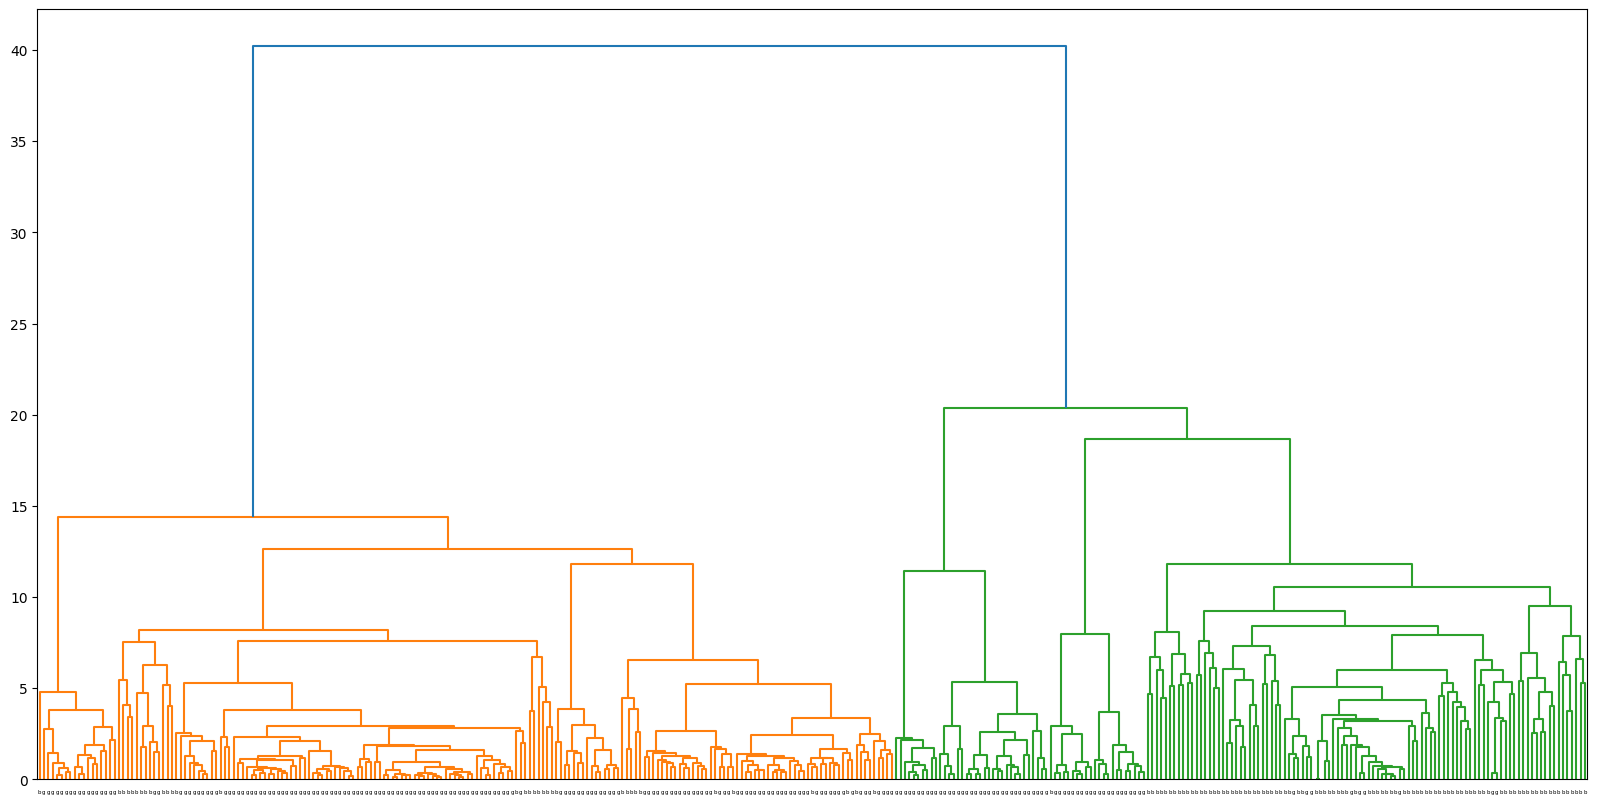

In [18]:
fig = plt.figure(figsize=(20, 10))
R = dendrogram(
    Z=distance_matrix_ward,
    labels=y.Class.to_numpy(),
    orientation="top",
    leaf_font_size=4,
    leaf_rotation=0
)
plt.show()

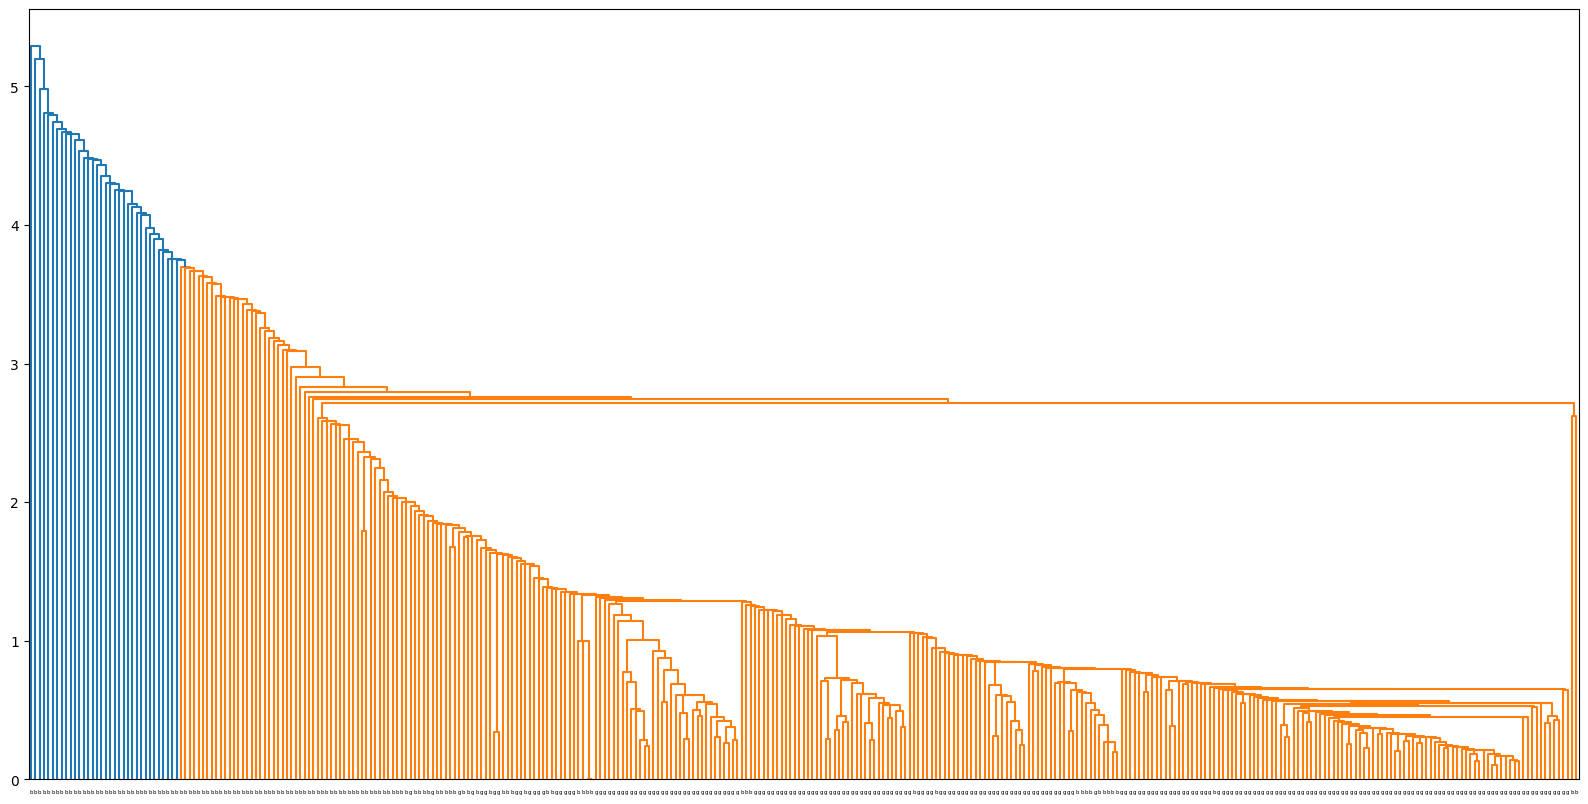

In [28]:
fig = plt.figure(figsize=(20, 10))
R = dendrogram(
    Z=distance_matrix_single,
    labels=y.Class.to_numpy(),
    orientation="top",
    leaf_font_size=4,
    leaf_rotation=0
)
plt.show()

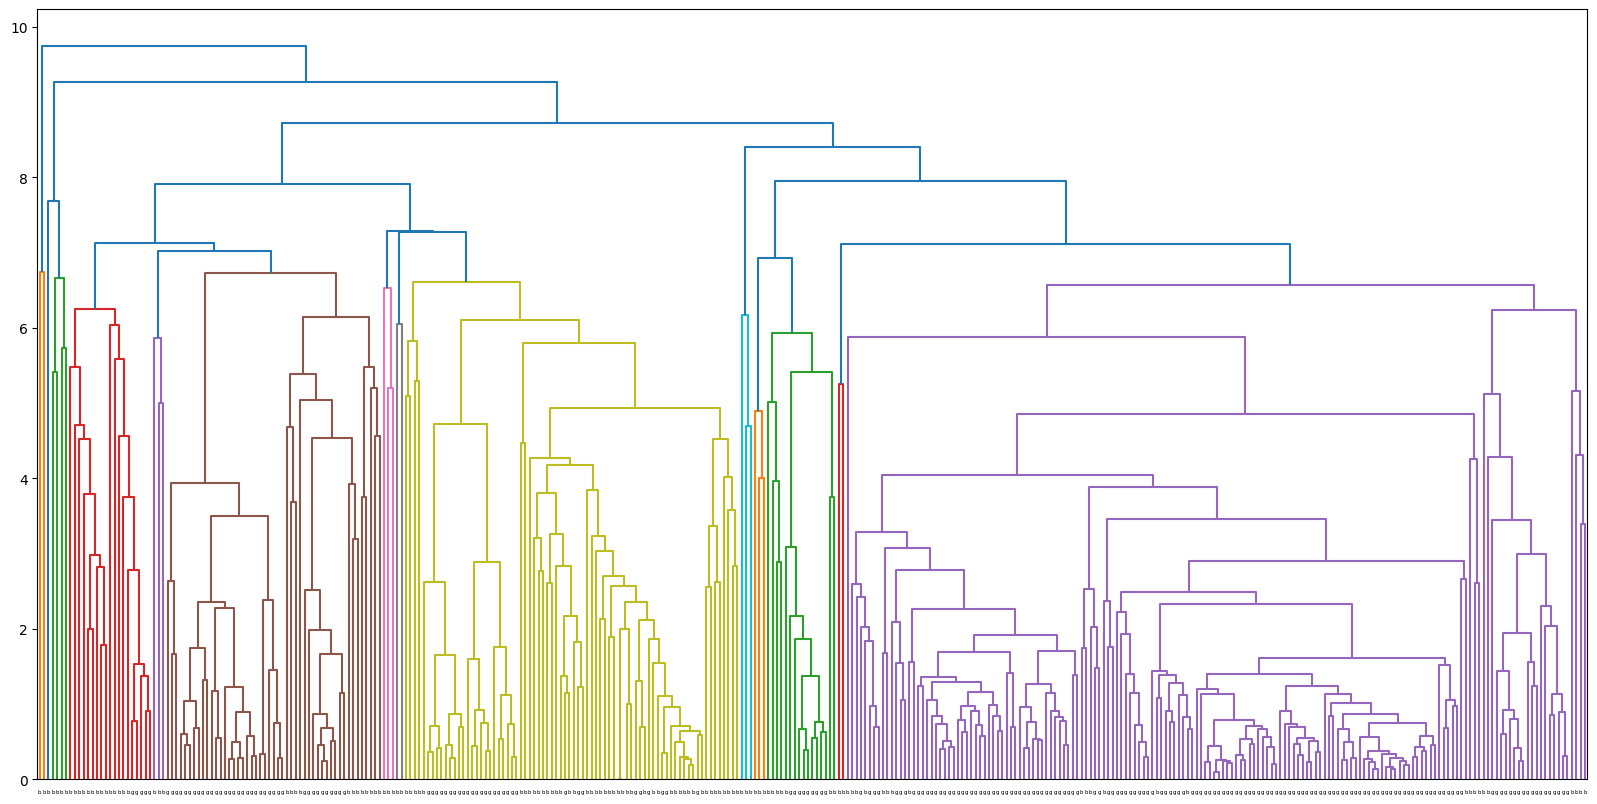

In [26]:
fig = plt.figure(figsize=(20, 10))
R = dendrogram(
    Z=distance_matrix_complete,
    labels=y.Class.to_numpy(),
    orientation="top",
    leaf_font_size=4,
    leaf_rotation=0
)
plt.show()

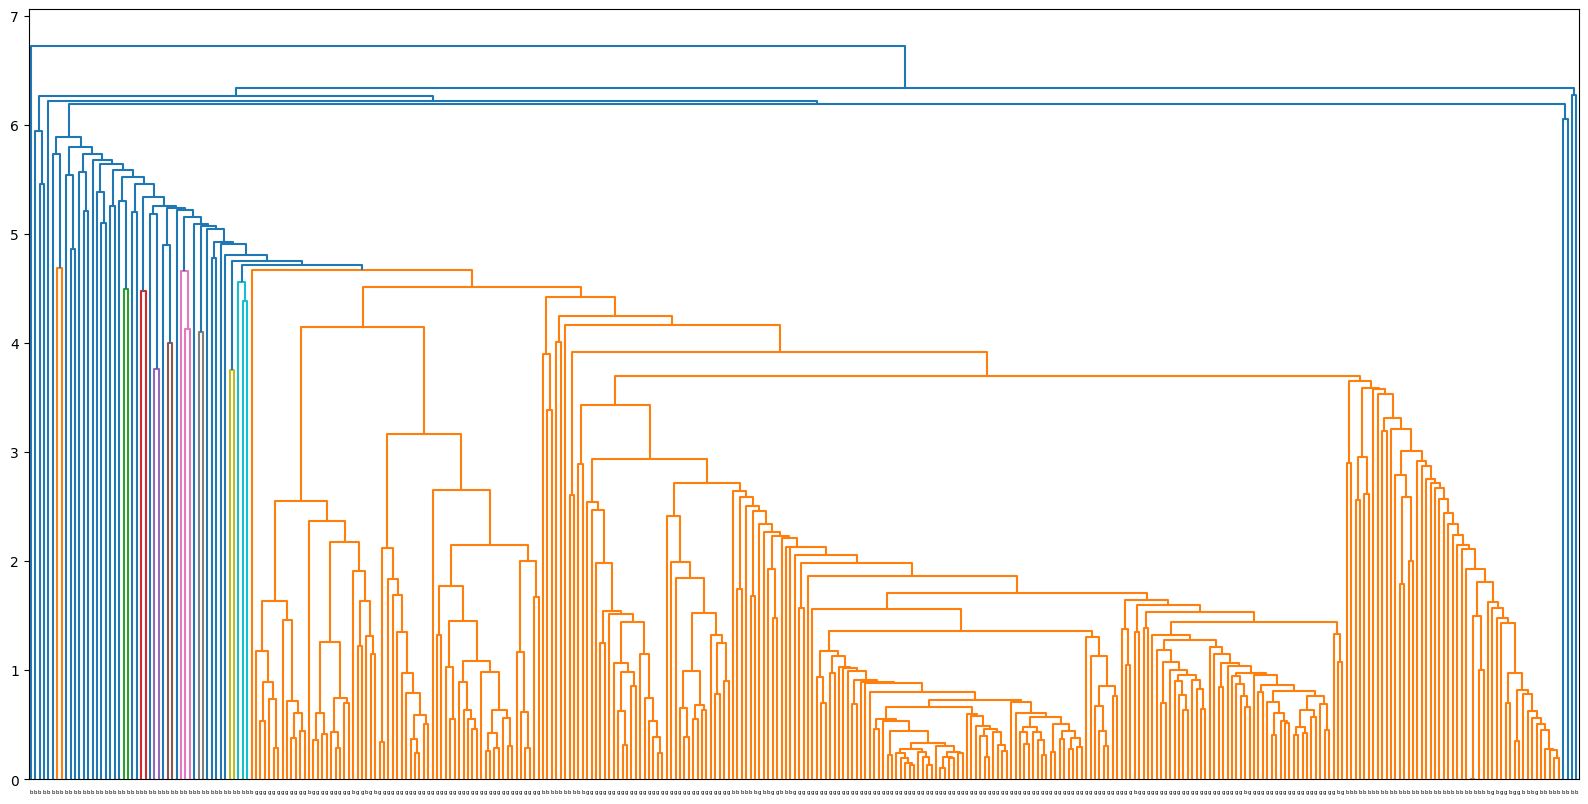

In [22]:
fig = plt.figure(figsize=(20, 10))
R = dendrogram(
    Z=distance_matrix_average,
    labels=y.Class.to_numpy(),
    orientation="top",
    leaf_font_size=4,
    leaf_rotation=0
)
plt.show()

### Метки кластеров

In [21]:
x_small = pd.DataFrame()
x_small["A1"] = X["Attribute10"]
x_small["A2"] = X["Attribute24"]
x_small["y"] = [key(p) for p in np.array(y.Class)]

x_small["y_ward"] = fcluster(distance_matrix_ward, 2, criterion="maxclust")
x_small["y_single"] = fcluster(distance_matrix_single, 2, criterion="maxclust")
x_small["y_complete"] = fcluster(distance_matrix_complete, 2, criterion="maxclust")
x_small["y_average"] = fcluster(distance_matrix_average, 2, criterion="maxclust")

x_small.head()

,A1,A2,y,y_ward,y_single,y_complete,y_average
0,0.03760,-0.47357,0,1,1,2,1
1,-0.04549,-0.35734,1,2,1,2,1
2,0.01198,-0.12062,0,1,1,2,1
3,0.00000,0.00000,1,2,1,2,1
4,-0.16399,-0.52879,0,1,1,2,1


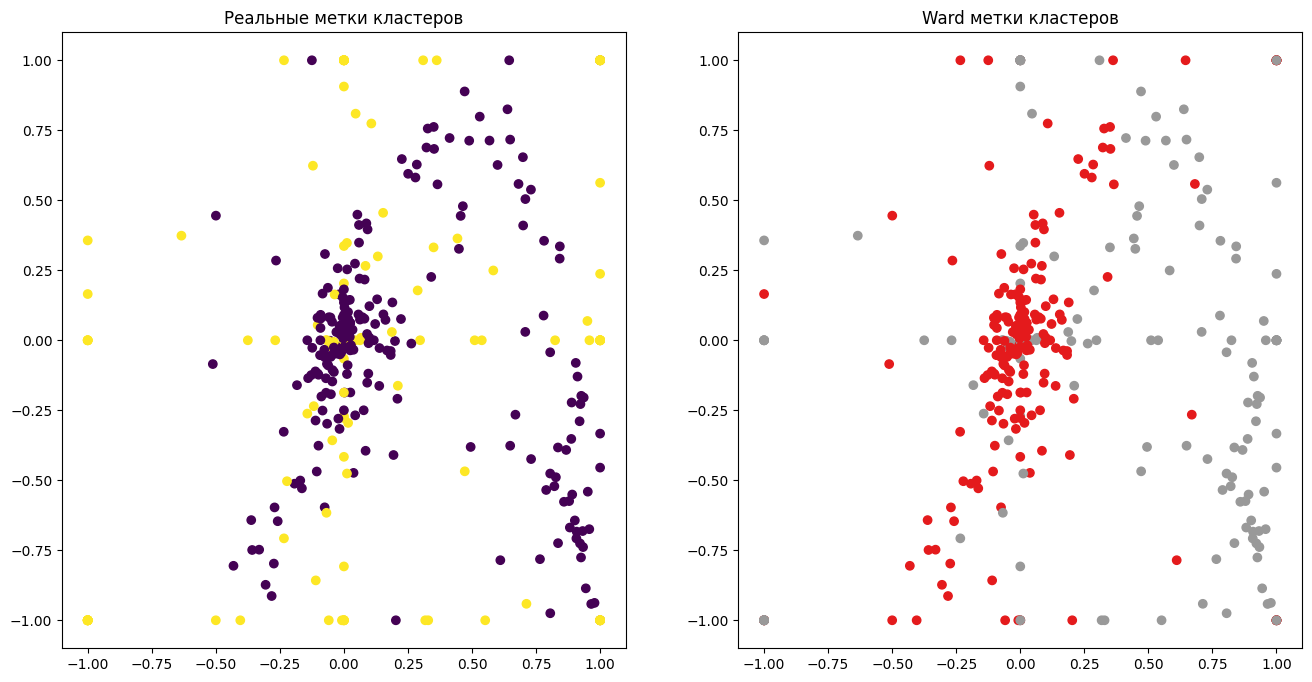

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(x_small["A1"], x_small["A2"], c=x_small["y"])
axes[1].scatter(x_small["A1"], x_small["A2"], c=x_small["y_ward"], cmap=plt.cm.Set1)
axes[0].set_title("Реальные метки кластеров")
axes[1].set_title("Ward метки кластеров")

plt.show()

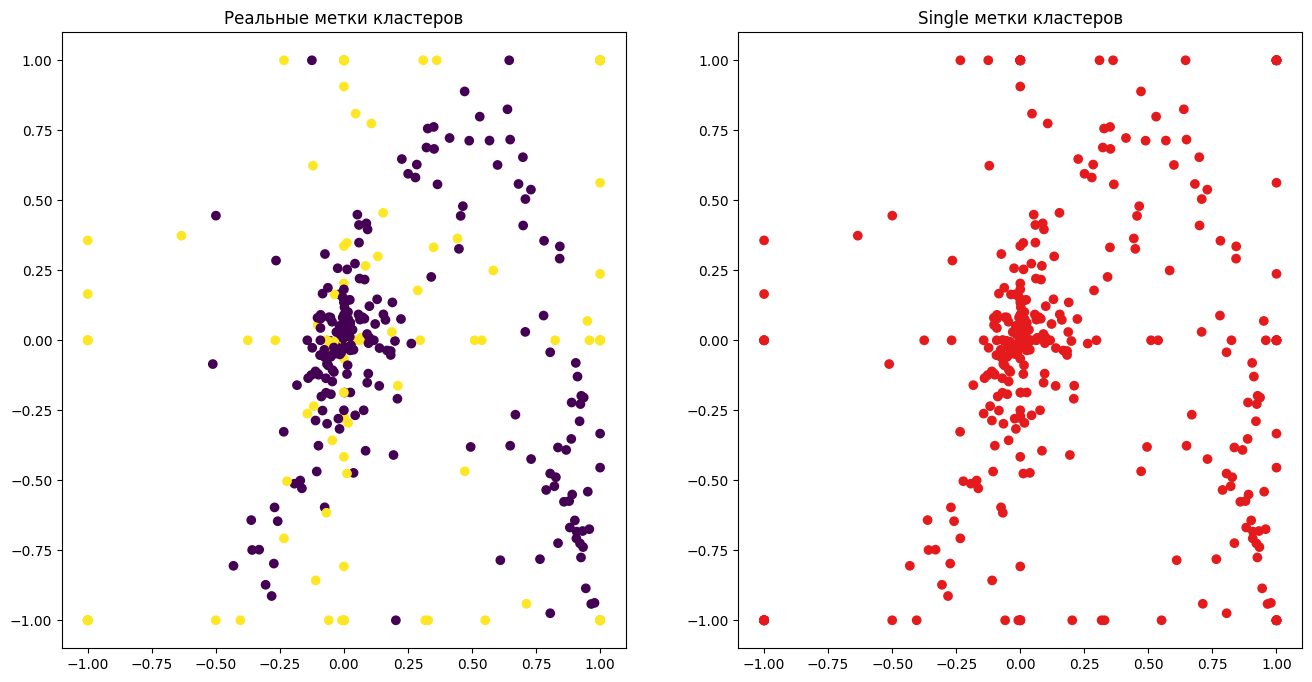

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(x_small["A1"], x_small["A2"], c=x_small["y"])
axes[1].scatter(x_small["A1"], x_small["A2"], c=x_small["y_single"], cmap=plt.cm.Set1)
axes[0].set_title("Реальные метки кластеров")
axes[1].set_title("Single метки кластеров")

plt.show()

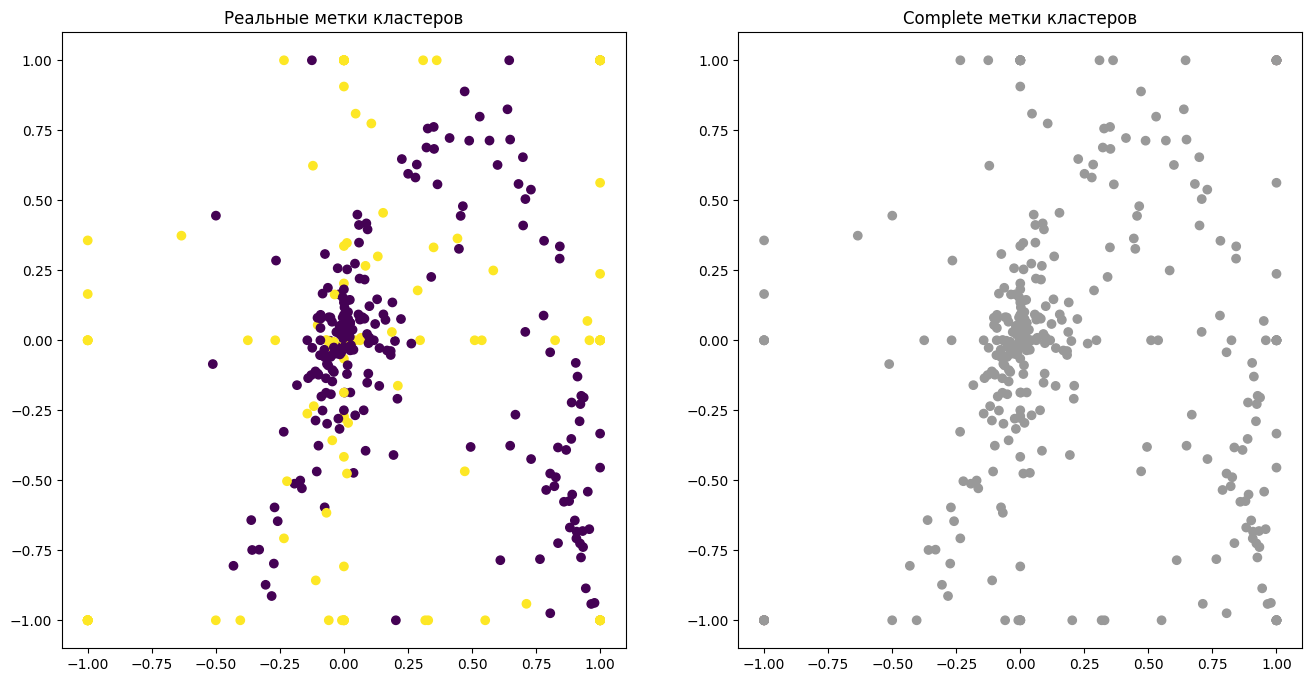

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(x_small["A1"], x_small["A2"], c=x_small["y"])
axes[1].scatter(x_small["A1"], x_small["A2"], c=x_small["y_complete"], cmap=plt.cm.Set1)
axes[0].set_title("Реальные метки кластеров")
axes[1].set_title("Complete метки кластеров")

plt.show()

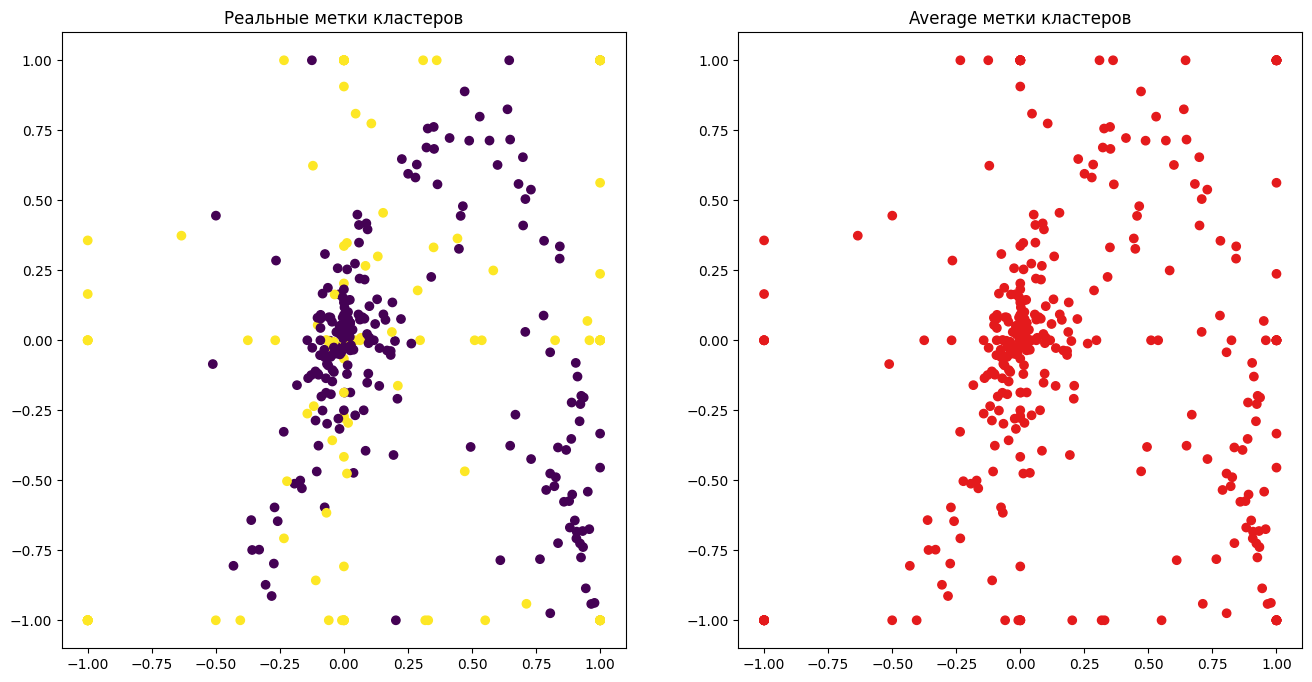

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(x_small["A1"], x_small["A2"], c=x_small["y"])
axes[1].scatter(x_small["A1"], x_small["A2"], c=x_small["y_average"], cmap=plt.cm.Set1)
axes[0].set_title("Реальные метки кластеров")
axes[1].set_title("Average метки кластеров")

plt.show()

In [40]:
print("Истинное: ", count(x_small["y"]))
print("Ward: ", count(x_small["y_ward"]))
print("Single: ", count(x_small["y_single"]))
print("Complete: ", count(x_small["y_complete"]))
print("Average: ", count(x_small["y_average"]))

Истинное:  {0: 225, 1: 126}
Ward:  {1: 194, 2: 157}
Single:  {1: 350, 2: 1}
Complete:  {2: 349, 1: 2}
Average:  {1: 350, 2: 1}


### K-means

In [4]:
WCSS = []
Silh = []
for i in range(2, 11):
    kmeans = KMeans(
        n_clusters=i, 
        init="k-means++", 
        max_iter=300, 
        n_init=10, 
        random_state=1702
    )
    kmeans.fit(X)
    answers = kmeans.fit_predict(X)
    WCSS.append(kmeans.inertia_)
    Silh.append(silhouette_score(X, answers, metric="euclidean"))

#### Кластерные силуэты

For n_clusters = 2 The average silhouette_score is : 0.2959701497777326
For n_clusters = 3 The average silhouette_score is : 0.2855585269297777
For n_clusters = 4 The average silhouette_score is : 0.3039450716009924
For n_clusters = 5 The average silhouette_score is : 0.2671309254869041
For n_clusters = 6 The average silhouette_score is : 0.22063139466510392
For n_clusters = 7 The average silhouette_score is : 0.15950316308335963
For n_clusters = 8 The average silhouette_score is : 0.19225188207765026
For n_clusters = 9 The average silhouette_score is : 0.19340711801643526
For n_clusters = 10 The average silhouette_score is : 0.1886454390631208


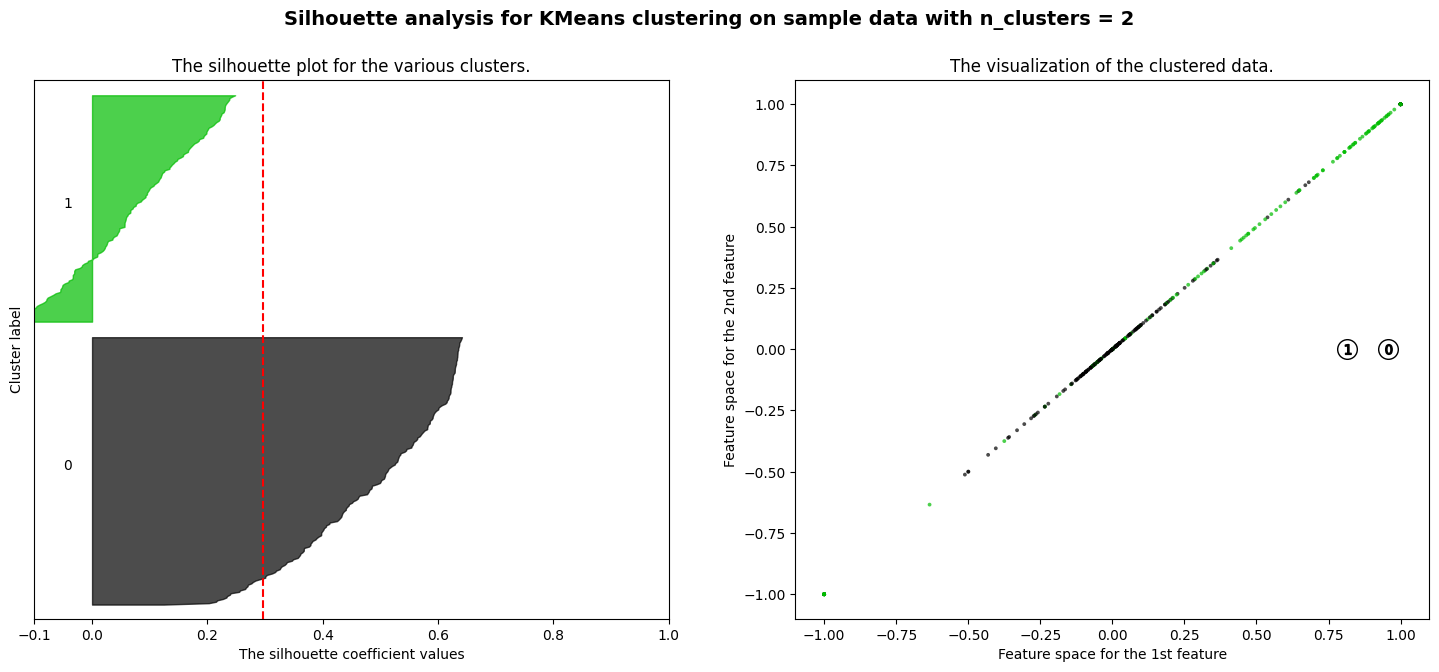

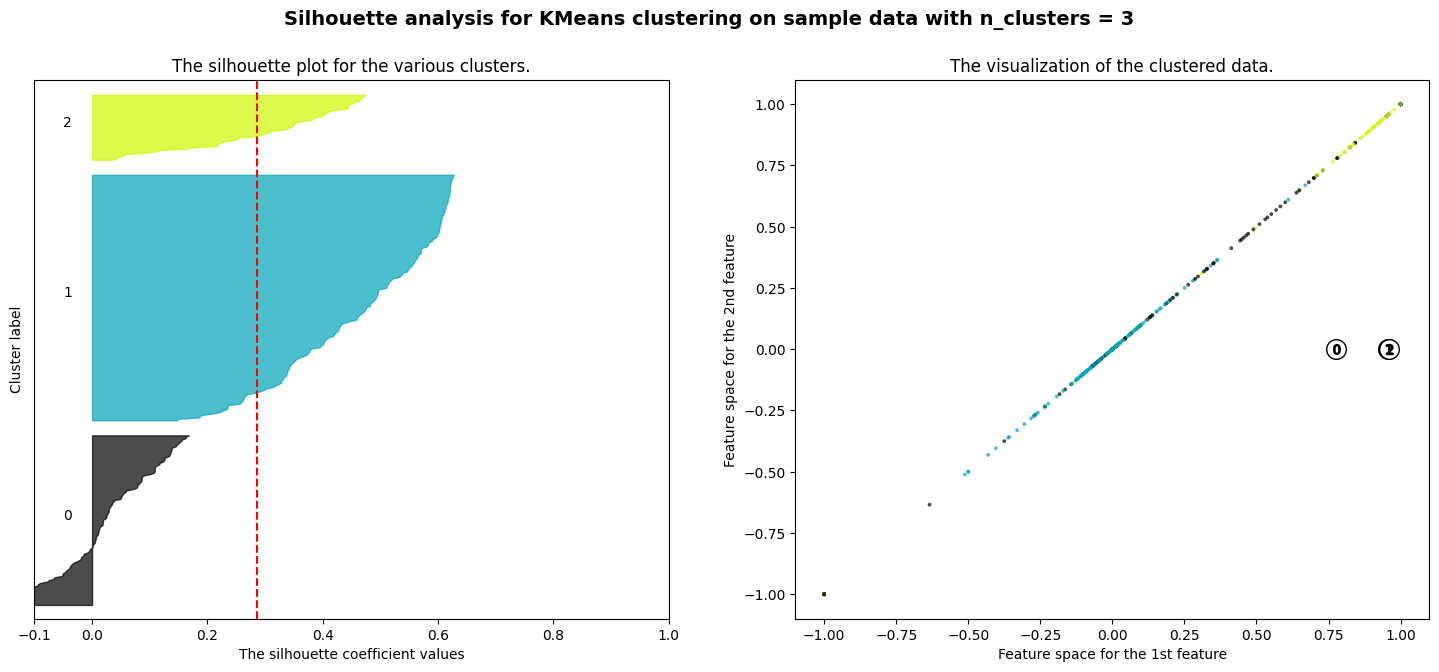

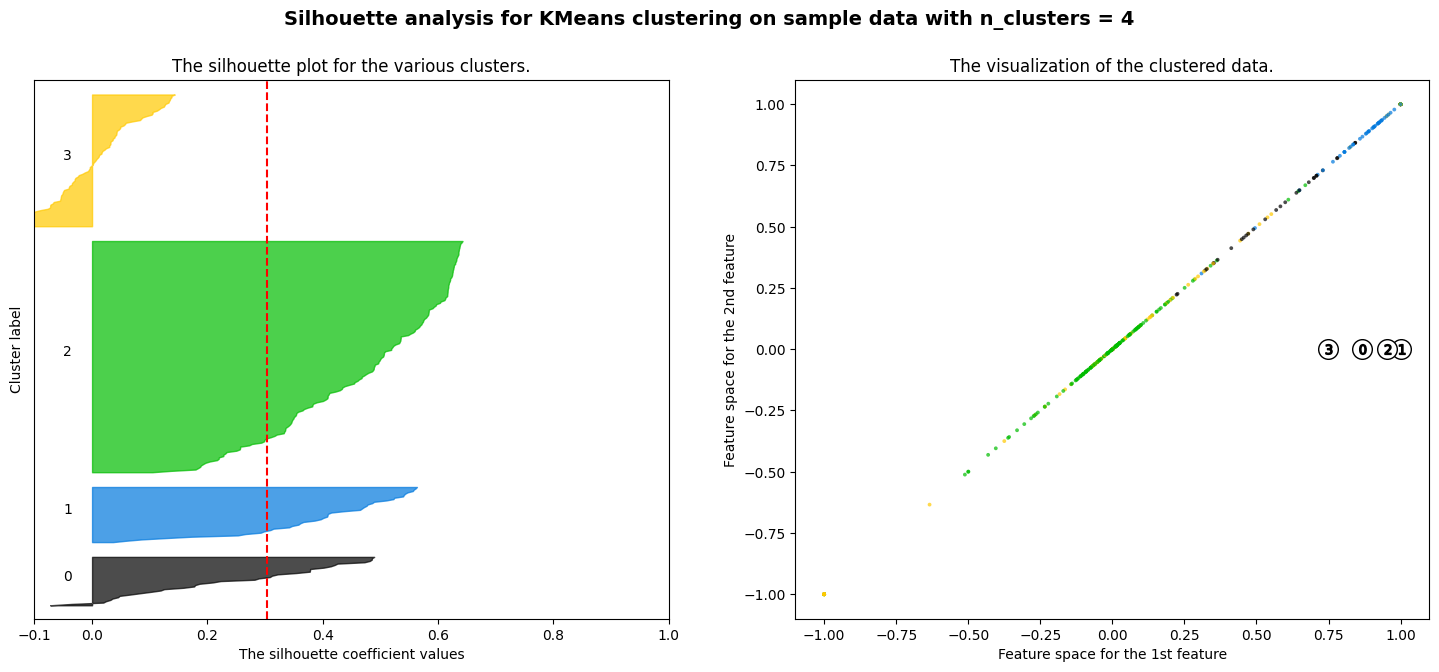

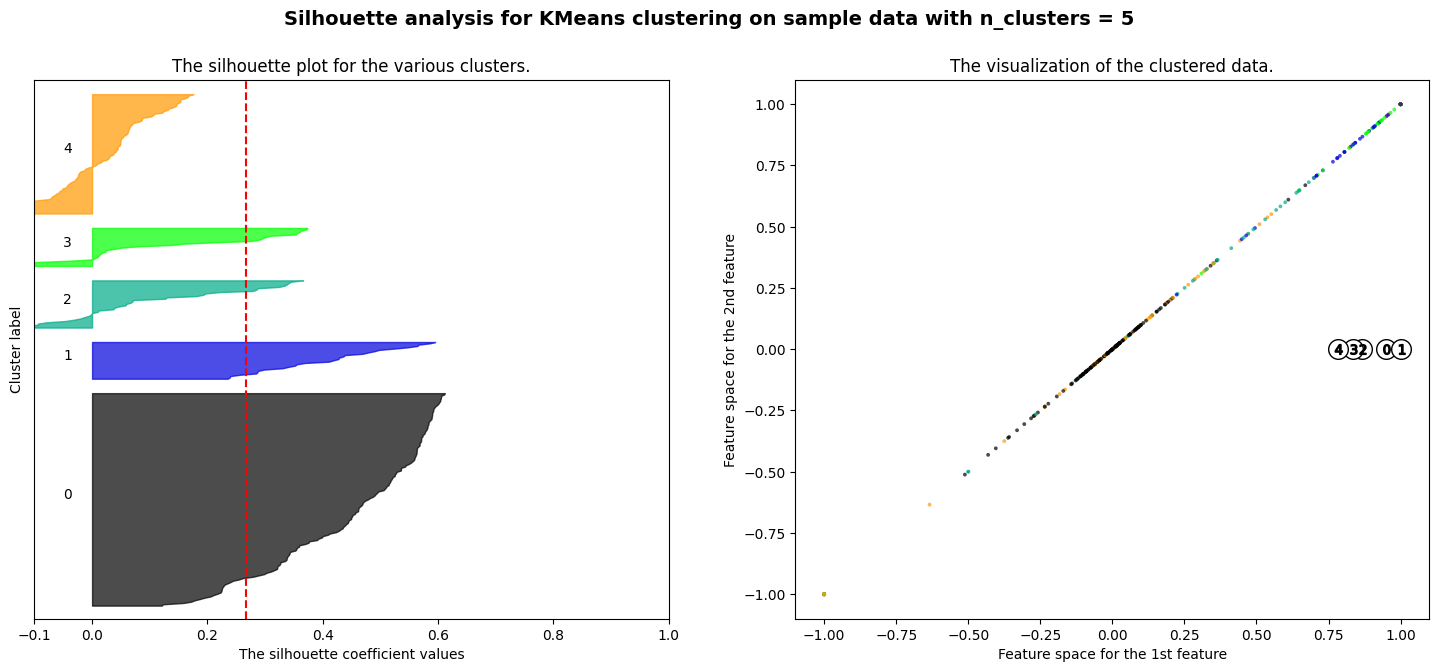

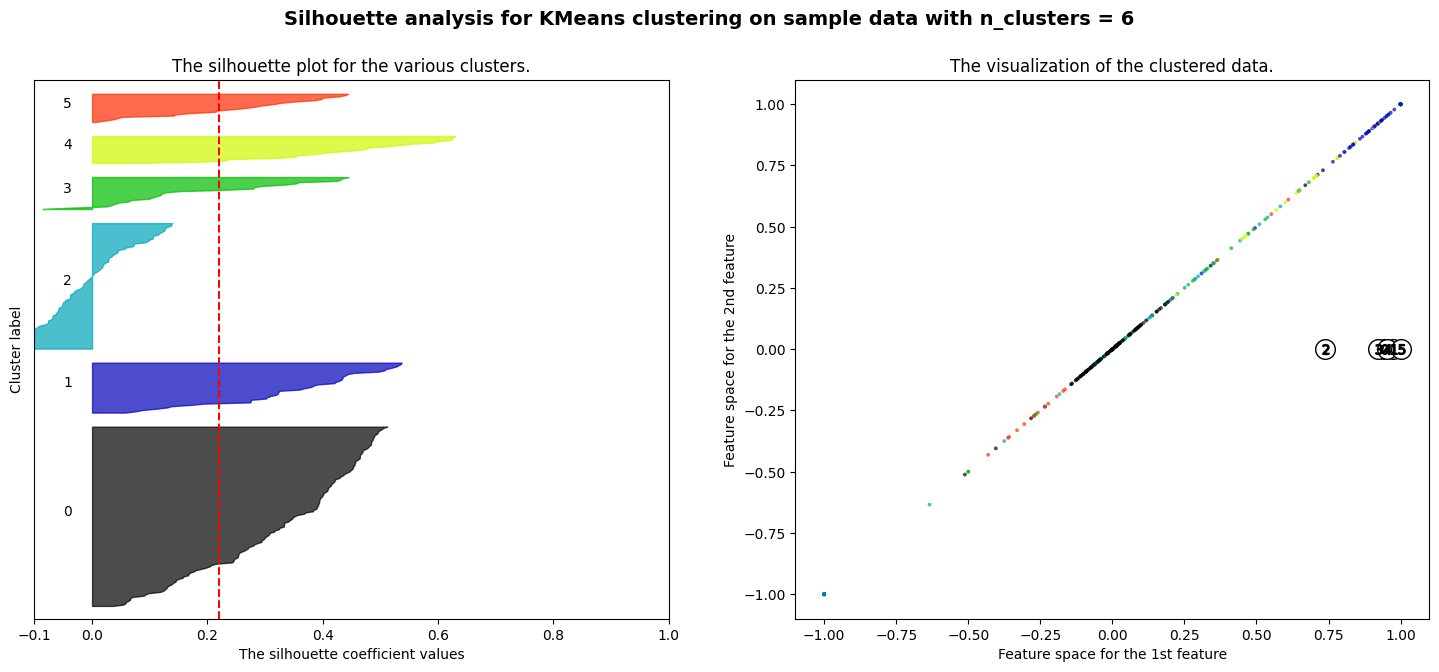

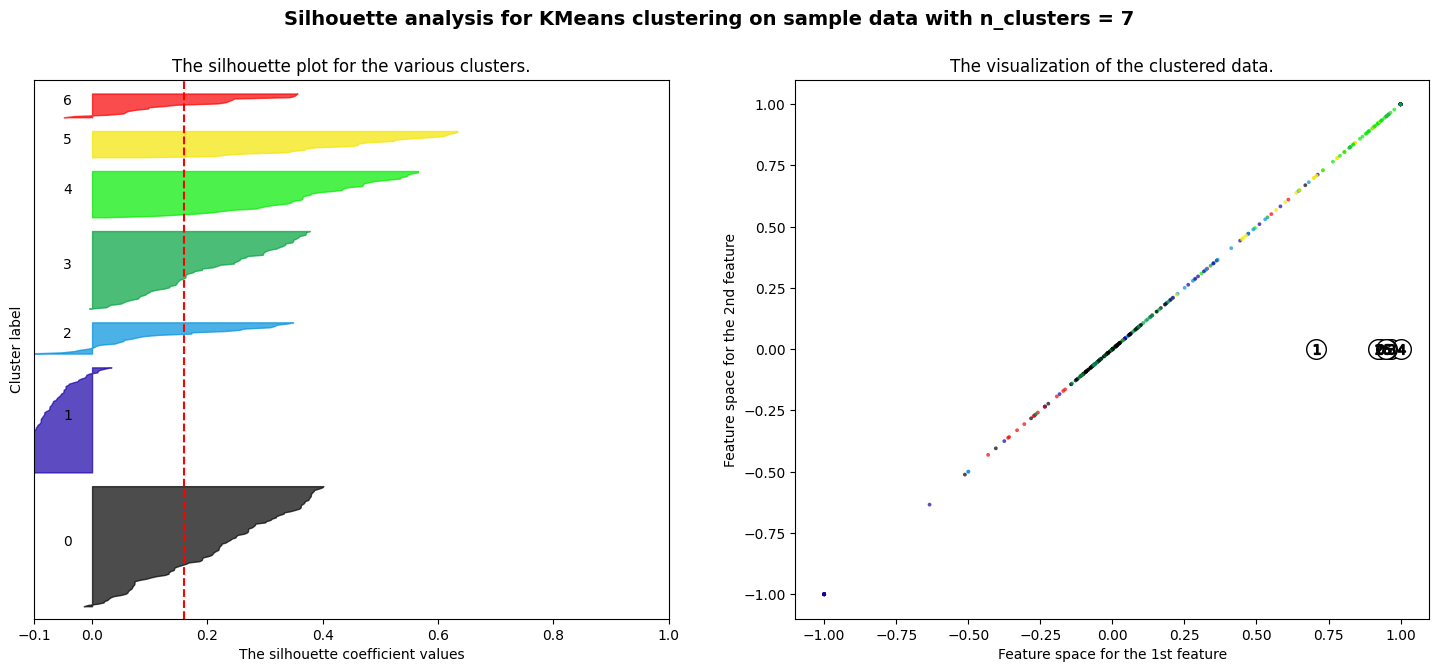

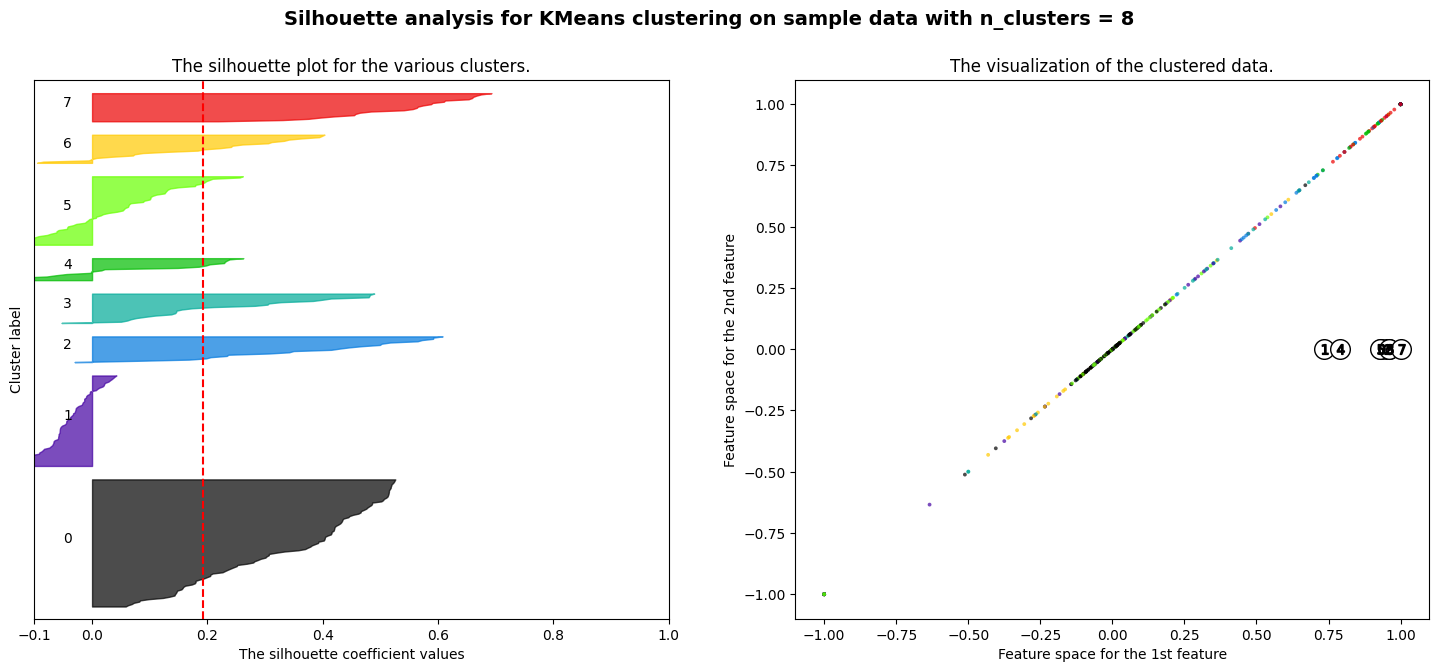

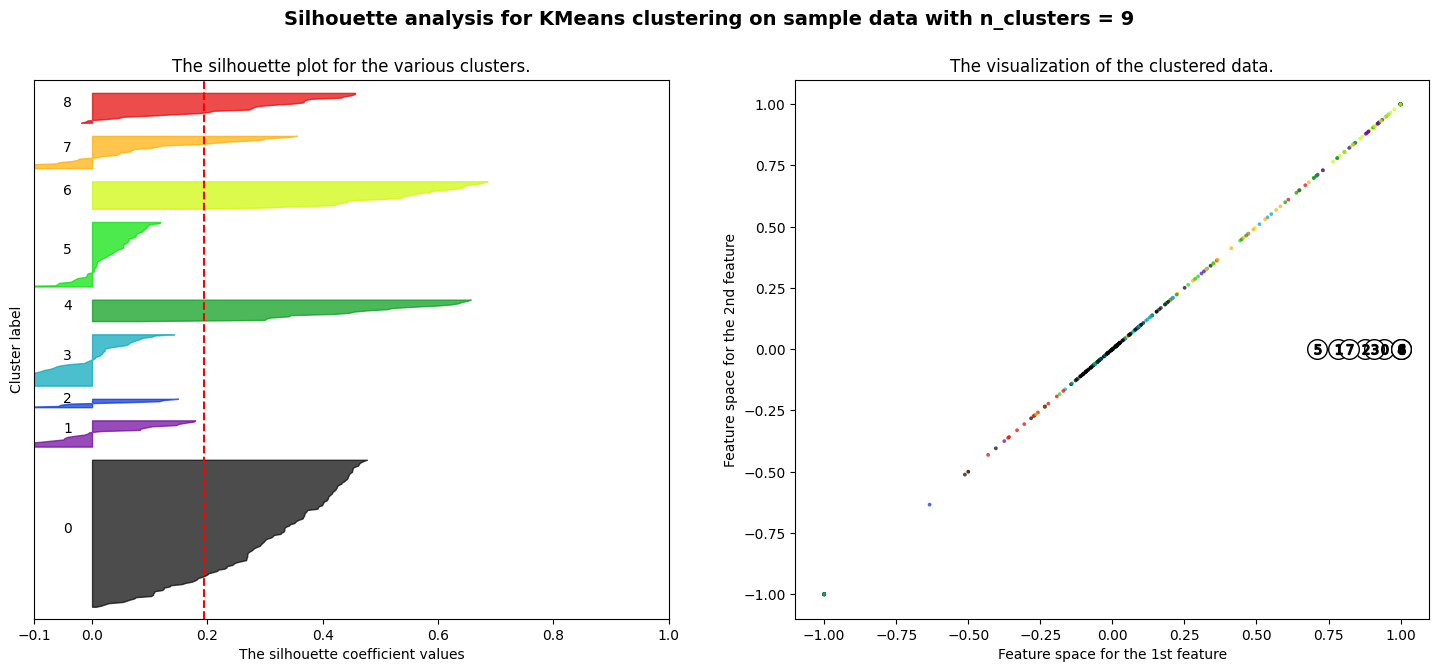

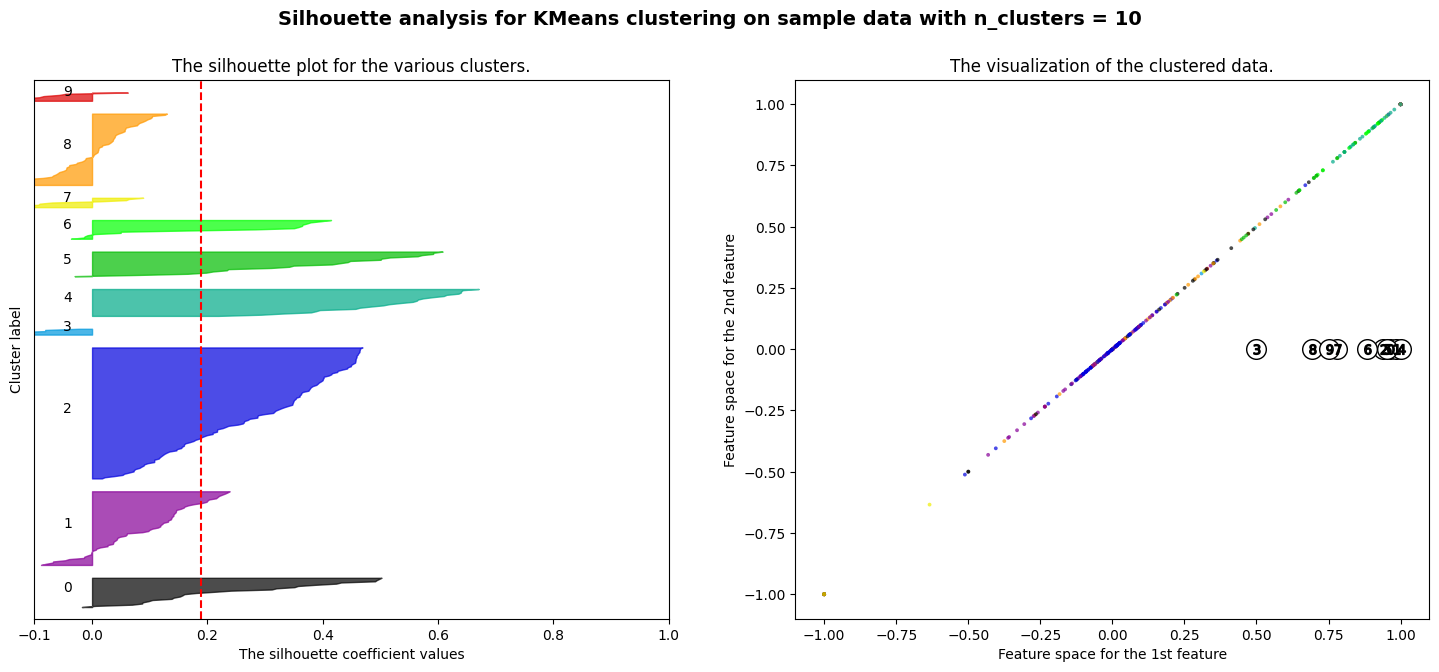

In [3]:
sil_kl(X, range(2, 11))

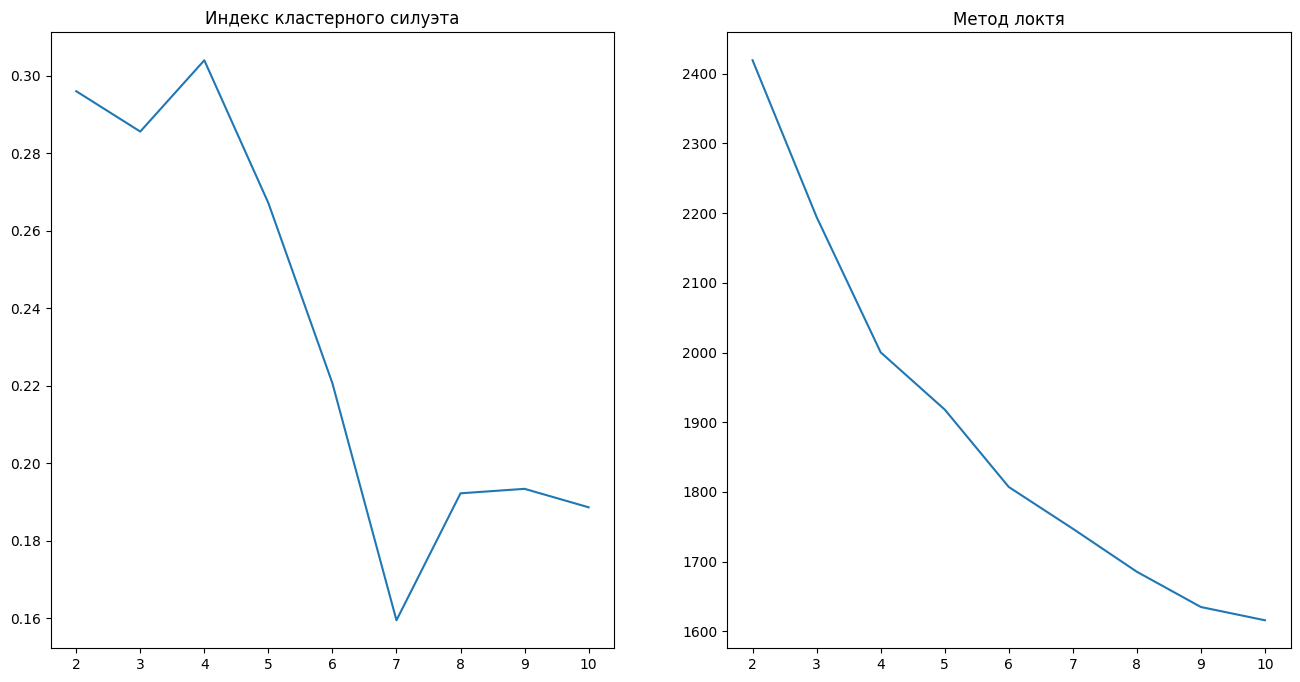

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].plot(range(2, 11), Silh)
axes[1].plot(range(2, 11), WCSS)
axes[0].set_title("Индекс кластерного силуэта")
axes[1].set_title("Метод локтя")

plt.show()

#### Для реального количество классов - 2

In [52]:
kmeans = KMeans(
        n_clusters=2, 
        init="k-means++", 
        max_iter=300, 
        n_init=10, 
        random_state=1702
    )
kmeans.fit(X)
answers_kmeans = kmeans.fit_predict(X)

cent_a1 = kmeans.cluster_centers_[:, 10]
cent_a2 = kmeans.cluster_centers_[:, 24]

print(cent_a1)
print(cent_a2)

[0.82261821 0.06734565]
[0.70535295 0.0312187 ]


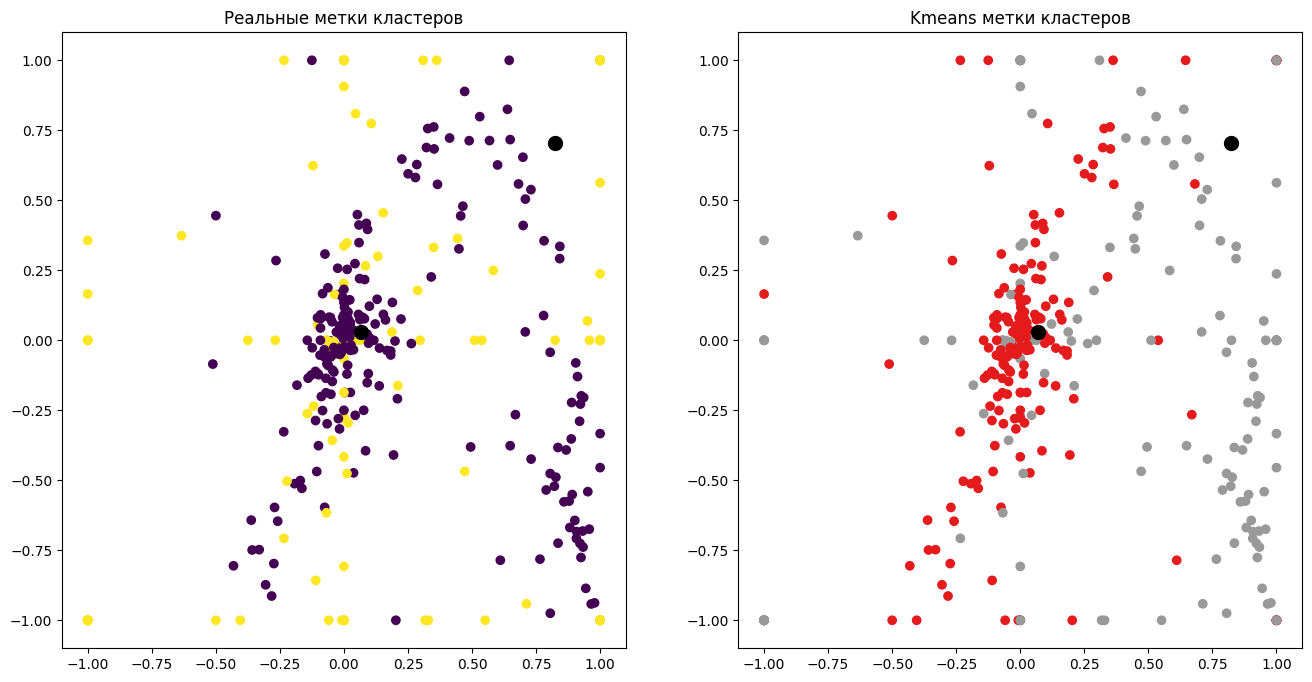

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(x_small["A1"], x_small["A2"], c=x_small["y"])
axes[1].scatter(x_small["A1"], x_small["A2"], c=answers_kmeans, cmap=plt.cm.Set1)
axes[0].set_title("Реальные метки кластеров")
axes[1].set_title("Kmeans метки кластеров")
axes[0].scatter(cent_a1, cent_a2, s=100, c = "black")
axes[1].scatter(cent_a1, cent_a2, s=100, c = "black")

plt.show()

#### По показателям - оптимальное (?) количество классов

##### 4 - по локтю и силуэту

In [56]:
kmeans = KMeans(
        n_clusters=4, 
        init="k-means++", 
        max_iter=300, 
        n_init=10, 
        random_state=1702
    )
kmeans.fit(X)
answers_kmeans = kmeans.fit_predict(X)

cent_a1 = kmeans.cluster_centers_[:, 10]
cent_a2 = kmeans.cluster_centers_[:, 24]

print(cent_a1)
print(cent_a2)

[ 0.50466919 -0.40753714  0.84486711  0.19618081]
[-0.15434838  0.11888476  0.74298023  0.11338808]


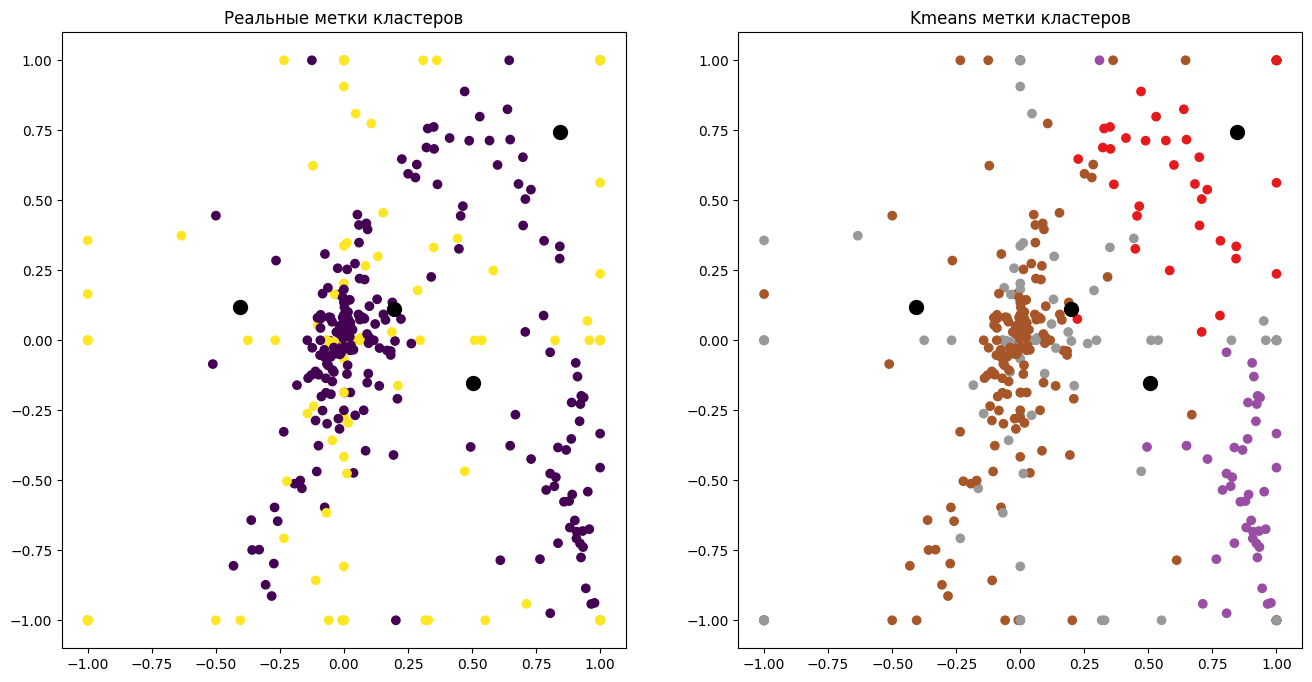

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(x_small["A1"], x_small["A2"], c=x_small["y"])
axes[1].scatter(x_small["A1"], x_small["A2"], c=answers_kmeans, cmap=plt.cm.Set1)
axes[0].set_title("Реальные метки кластеров")
axes[1].set_title("Kmeans метки кластеров")
axes[0].scatter(cent_a1, cent_a2, s=100, c = "black")
axes[1].scatter(cent_a1, cent_a2, s=100, c = "black")

plt.show()

##### 7 - по минимум силуэту

In [58]:
kmeans = KMeans(
        n_clusters=7, 
        init="k-means++", 
        max_iter=300, 
        n_init=10, 
        random_state=1702
    )
kmeans.fit(X)
answers_kmeans = kmeans.fit_predict(X)

cent_a1 = kmeans.cluster_centers_[:, 10]
cent_a2 = kmeans.cluster_centers_[:, 24]

print(cent_a1)
print(cent_a2)

[ 0.92932938  0.15211812  0.82683423  0.59480937 -0.43076842  0.37135682
  0.6646895 ]
[ 0.88132629  0.08386412  0.47376038  0.46653667  0.22003026 -0.56997409
  0.4447435 ]


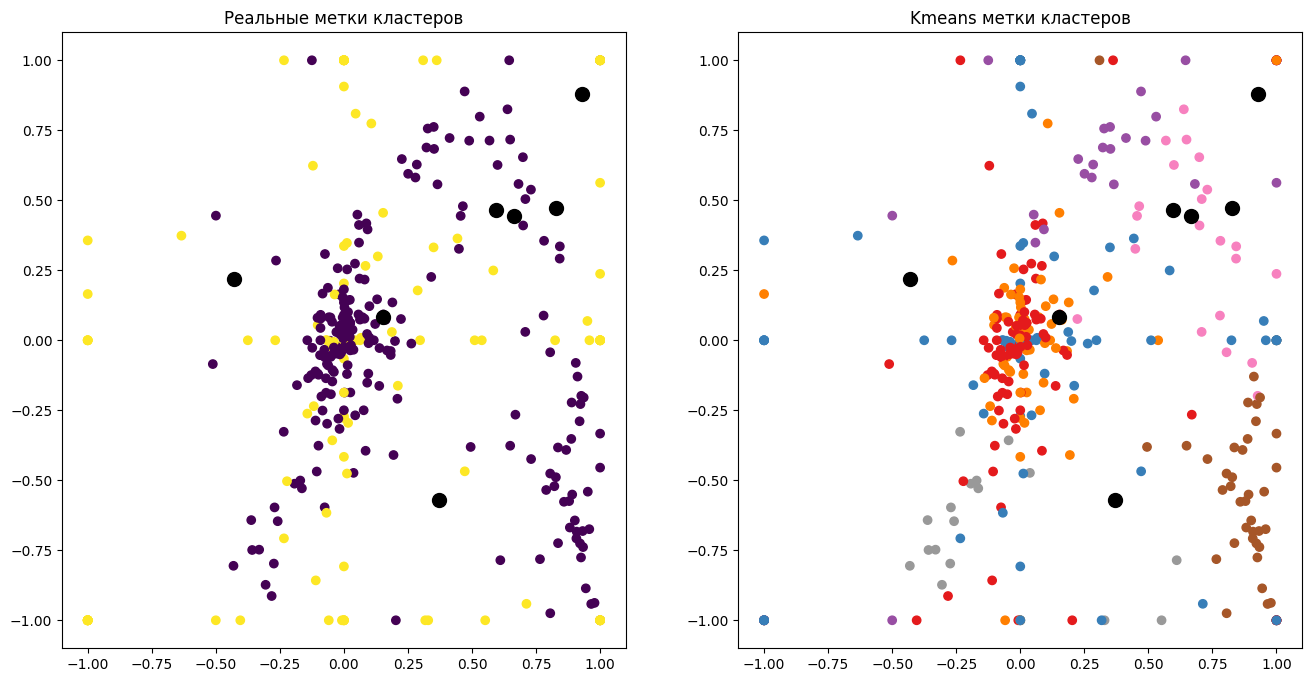

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(x_small["A1"], x_small["A2"], c=x_small["y"])
axes[1].scatter(x_small["A1"], x_small["A2"], c=answers_kmeans, cmap=plt.cm.Set1)
axes[0].set_title("Реальные метки кластеров")
axes[1].set_title("Kmeans метки кластеров")
axes[0].scatter(cent_a1, cent_a2, s=100, c = "black")
axes[1].scatter(cent_a1, cent_a2, s=100, c = "black")

plt.show()

##### 6 - вариант локтя

In [77]:
kmeans = KMeans(
        n_clusters=6, 
        init="k-means++", 
        max_iter=300, 
        n_init=10, 
        random_state=1702
    )
kmeans.fit(X)
answers_kmeans = kmeans.fit_predict(X)

cent_a1 = kmeans.cluster_centers_[:, 10]
cent_a2 = kmeans.cluster_centers_[:, 24]

print(cent_a1)
print(cent_a2)

[ 0.82336177 -0.43423     0.19508121  0.81376731  0.37135682  0.85975913]
[ 0.75117461  0.20902875  0.12286808  0.45030769 -0.56997409  0.58408652]


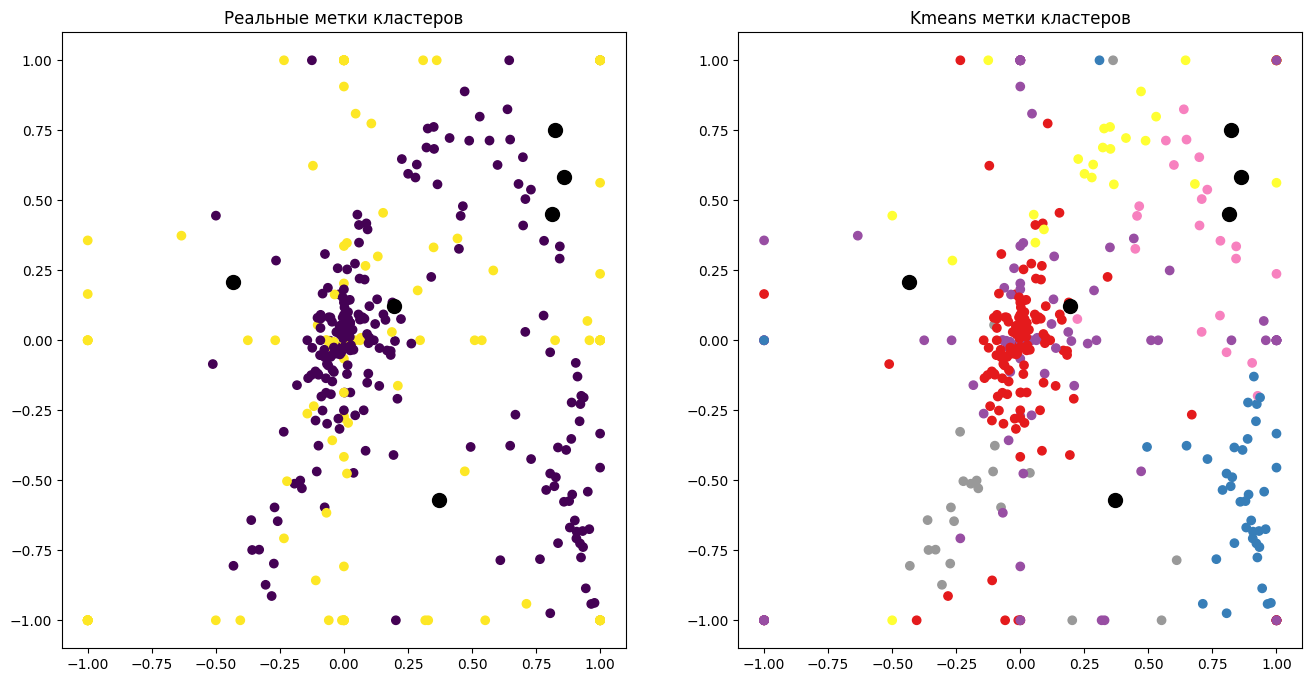

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(x_small["A1"], x_small["A2"], c=x_small["y"])
axes[1].scatter(x_small["A1"], x_small["A2"], c=answers_kmeans, cmap=plt.cm.Set1)
axes[0].set_title("Реальные метки кластеров")
axes[1].set_title("Kmeans метки кластеров")
axes[0].scatter(cent_a1, cent_a2, s=100, c = "black")
axes[1].scatter(cent_a1, cent_a2, s=100, c = "black")

plt.show()

### FCM

In [72]:
Silh = []
for i in range(2, 11):
    fcm = FCM(n_clusters=i, m=2, max_iter=300, random_state=1702)
    fcm.fit(X.values)
    answers = fcm.predict(X.values)
    Silh.append(silhouette_score(X, answers, metric="euclidean"))

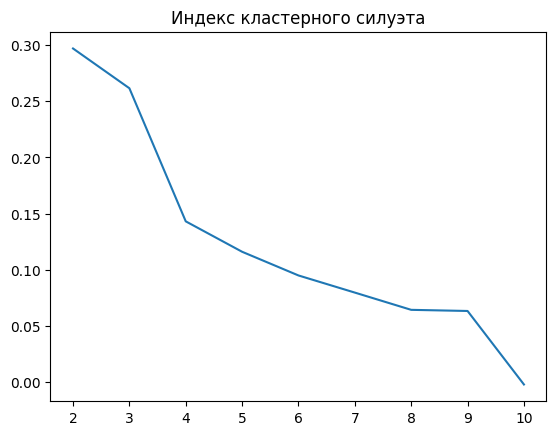

In [73]:
plt.plot(range(2, 11), Silh)
plt.title("Индекс кластерного силуэта")
plt.show()

#### 2 - максимальный индекс

In [84]:
fcm = FCM(n_clusters=2, m=2, max_iter=300, random_state=1702)
fcm.fit(X.values)
answers_fcm = fcm.predict(X.values)

cent_a1 = fcm.centers[:, 10]
cent_a2 = fcm.centers[:, 24]

print(cent_a1)
print(cent_a2)

[0.12983026 0.73616915]
[0.06482385 0.65481445]


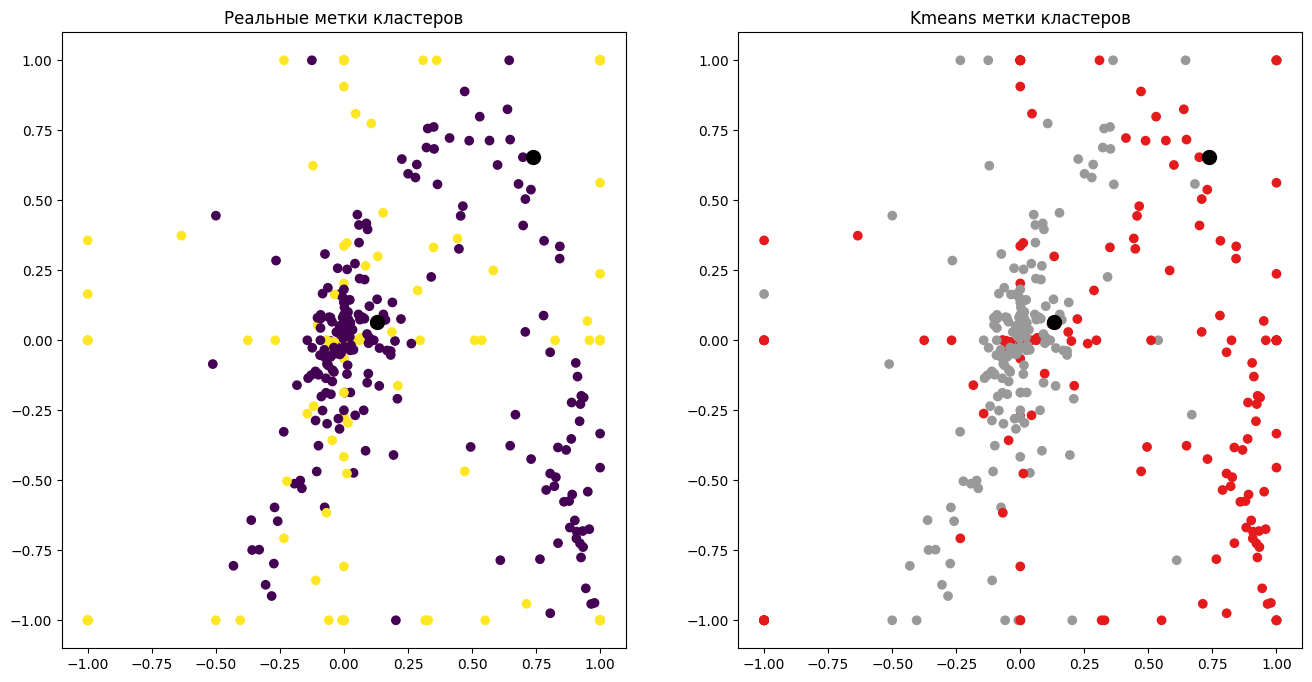

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(x_small["A1"], x_small["A2"], c=x_small["y"])
axes[1].scatter(x_small["A1"], x_small["A2"], c=answers_fcm, cmap=plt.cm.Set1)
axes[0].set_title("Реальные метки кластеров")
axes[1].set_title("Kmeans метки кластеров")
axes[0].scatter(cent_a1, cent_a2, s=100, c = "black")
axes[1].scatter(cent_a1, cent_a2, s=100, c = "black")

plt.show()

#### 3 - для пробы

In [88]:
fcm = FCM(n_clusters=3, m=2, max_iter=300, random_state=1702)
fcm.fit(X.values)
answers_fcm = fcm.predict(X.values)

cent_a1 = fcm.centers[:, 10]
cent_a2 = fcm.centers[:, 24]

print(cent_a1)
print(cent_a2)

[0.23799623 0.17805132 0.80580389]
[0.15132454 0.10945656 0.74011375]


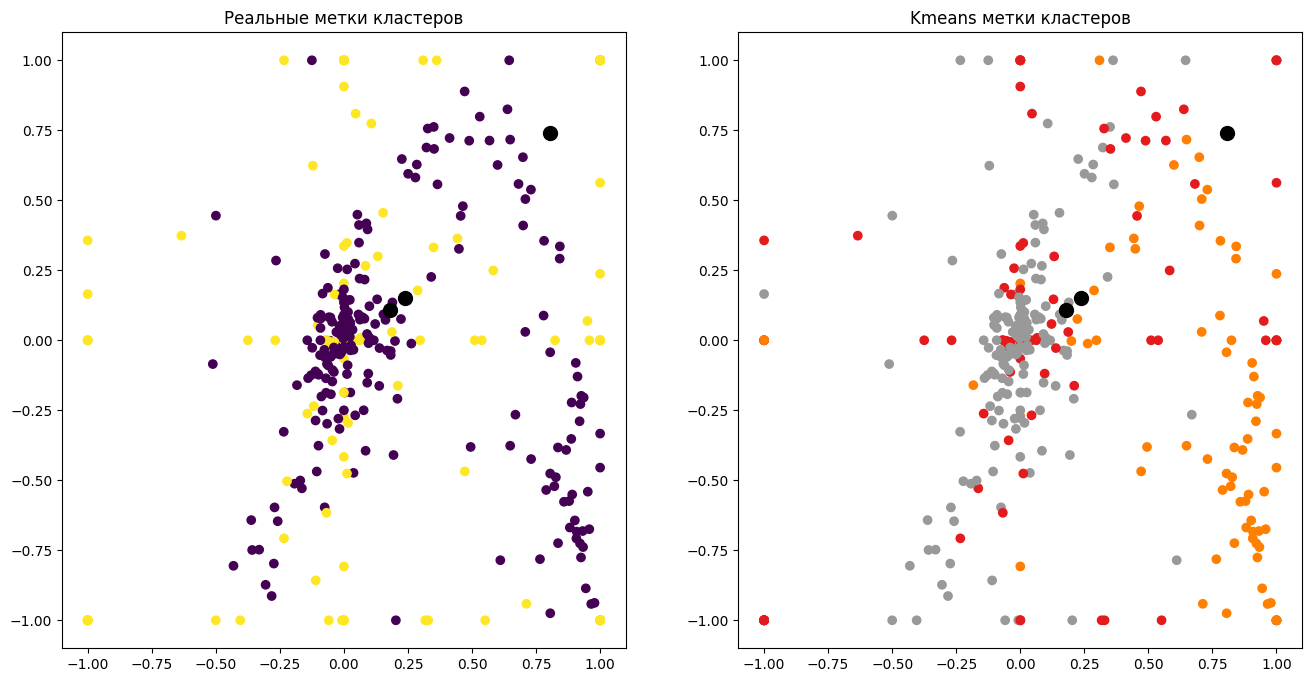

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(x_small["A1"], x_small["A2"], c=x_small["y"])
axes[1].scatter(x_small["A1"], x_small["A2"], c=answers_fcm, cmap=plt.cm.Set1)
axes[0].set_title("Реальные метки кластеров")
axes[1].set_title("Kmeans метки кластеров")
axes[0].scatter(cent_a1, cent_a2, s=100, c = "black")
axes[1].scatter(cent_a1, cent_a2, s=100, c = "black")

plt.show()

### DBSCAN

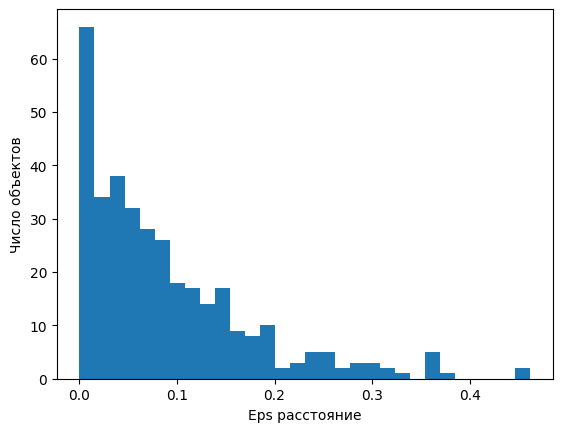

In [4]:
eps_dist = calculate_kn_distance(X, 5)
plt.hist(eps_dist, bins=30)
plt.ylabel("Число объектов")
plt.xlabel("Eps расстояние")
plt.show()

In [27]:
db = DBSCAN(
    eps=0.4,
    min_samples=5
).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

labels_true = [key(p) for p in np.array(y.Class)]

print(f"Число кластеров :{n_clusters}")
print(f"Число шумовых объектов: {n_noise}, при этом число объектов {len(X)}")
print(f"Homogeneity: {homogeneity_score(labels_true, labels)}")
print(f"Completeness: {completeness_score(labels_true, labels)}")
print(f"V-measure: {v_measure_score(labels_true, labels)}")
print(f"Adjusted Rand Index: {adjusted_rand_score(labels_true, labels)}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_score(labels_true, labels)}")
print(f"Silhoette score: {silhouette_score(X, labels)}")

Число кластеров :2
Число шумовых объектов: 306, при этом число объектов 351
Homogeneity: 0.10378416576270788
Completeness: 0.15841887687028974
V-measure: 0.12540945987465862
Adjusted Rand Index: -0.0328087420265607
Adjusted Mutual Information: 0.12031533652950638
Silhoette score: -0.23443165653718992


### Некоторые выводы

Текущий датасет - просто боль для кластеризации. Имея огромную размерность (пусть точки и не разбросаны в пространстве, они все достаточно близко друг к другу - значения колеблются от -1 до 1, данным даже rescale не нужен), датасет состоит всего лишь из двух классов, g и b. 

Более-менее адектватный вариант получился у FCM. И то с очень большими оговорками - при разбиении на 3 класса, а не на 2, какие-то паттерны в данных он выделить смог. Плюс на приблизительно таком же уровне справился ward, но об этом чуть ниже.

Остальные справишись от просто ужасно до просто отвратительно. 

DBSCAN больше 75% данных считает шумом при разных параметрах - это даже визуализировать не имеет смысла. 

Метки кластеров по 3 из 4 вариантов матриц связей (signle, complete, average) выдаёт полную ахинею, говоря, что все (sic!), кроме 1 или 2 точек, являются представителями одного класса (при истинном разбиении 255/126, что тоже не очень хорошо, лучше бы они были одинаковы по размерности, но что имеем). Ward ещё более-менее что-то попытался разбить, и его качество близко к FCM при двух кластерах (полагаю, что при трёх он тоже к этому приблизится).

К-средние запутался, что кластерный силуэт, что локоть даёт странную графику. Более-менее оптимальным считает 4 кластера (что, опять же, если несколько всмотреться на то, что получилось, то это имеет смысл. Просто объединить некоторые классы в один - и получится даже приблизительно то, что нужно. Весьма приблизительно, но если закрыть глаза и смотреть криво - то сойдёт).